In [31]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Reading the file

df = pd.read_csv('50_Startups.csv')

In [33]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [36]:
# Divide the data into dependents vs independents

X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [37]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [38]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [48]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
len(X_train)

40

In [50]:
len(X_test)

10

In [51]:
X_test

array([ 65605.48,  55493.95,  91749.16,   1000.23,  64664.71,  86419.7 ,
        78389.47, 120542.52, 100671.96,  76253.86])

In [52]:
y_test

array([101004.64,  96778.92, 124266.9 ,  64926.08, 107404.34, 122776.86,
       111313.02, 152211.77, 144259.4 , 118474.03])

In [53]:
X_train

array([ 61994.48, 162597.7 ,  28663.76,  15505.73, 165349.2 ,  94657.16,
        23640.93, 123334.88,  91992.39,      0.  ,  72107.6 ,  78013.11,
       101913.08,  75328.87,  77044.01, 142107.34,  46426.07,  27892.92,
        66051.52,      0.  , 130298.13, 153441.51,  38558.51,  73994.56,
        20229.59, 144372.41, 134615.46,   1315.46,  22177.74,  63408.86,
       131876.9 ,  46014.02, 114523.61,  61136.38,  44069.95,  93863.75,
          542.05, 119943.24,  28754.33,  67532.53])

In [54]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [55]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_test

array([[-0.16554249],
       [-0.37408082],
       [ 0.37363995],
       [-1.49794926],
       [-0.18494476],
       [ 0.26372615],
       [ 0.09811216],
       [ 0.9674689 ],
       [ 0.55766213],
       [ 0.05406774]])

In [57]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predictions

y_pred = regressor.predict(X_test)

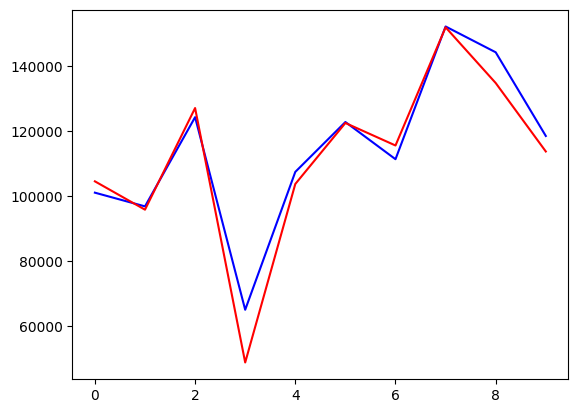

In [59]:
# Plotting of y_test vs y_pred

plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()

#### **Regression Metrics**

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)

4631.823997107274


In [66]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

42935323.28844114


In [67]:
print(np.sqrt(mse))

6552.505115483782


In [69]:
r2 = r2_score(y_pred, y_test)
print(r2)

0.9374705680786526


In [70]:
# Calculate the Adjusted-R-squared

n = X_test.shape[0]
K = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-1-K)

print(adjusted_r2)

0.9296543890884842
